In [113]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import pyarrow as pa
import os

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


import seaborn as sns

In [114]:
sg = pq.read_table('city=Singapore/'+'part-00000-8bbff892-97d2-4011-9961-703e38972569.c000.snappy.parquet')
sg = sg.to_pandas()

sg = sg.sample(frac = (0.05))


In [115]:
sg

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy
2952730,65751,car,android,1555138025,1.303484,103.853317,12.474921,305,4.000
1041831,148,car,ios,1554771359,1.389845,103.910991,9.917789,138,8.000
897268,64671,car,android,1554699971,1.329250,103.858195,13.776122,245,6.000
2986448,62914,car,android,1555376313,1.306888,103.818565,1.270000,81,3.000
699750,80212,car,android,1555165203,1.315281,103.846215,19.761515,217,8.000
...,...,...,...,...,...,...,...,...,...
668155,67775,car,android,1555294492,1.299237,103.897528,11.123254,153,4.000
1746818,62860,car,ios,1554723528,1.322051,103.813218,12.210000,209,10.000
2599216,29066,car,ios,1555488522,1.349619,103.858078,18.415125,339,8.000
1228071,69315,car,android,1555889135,1.371177,103.940861,3.530814,125,6.062


<IPython.core.display.Javascript object>


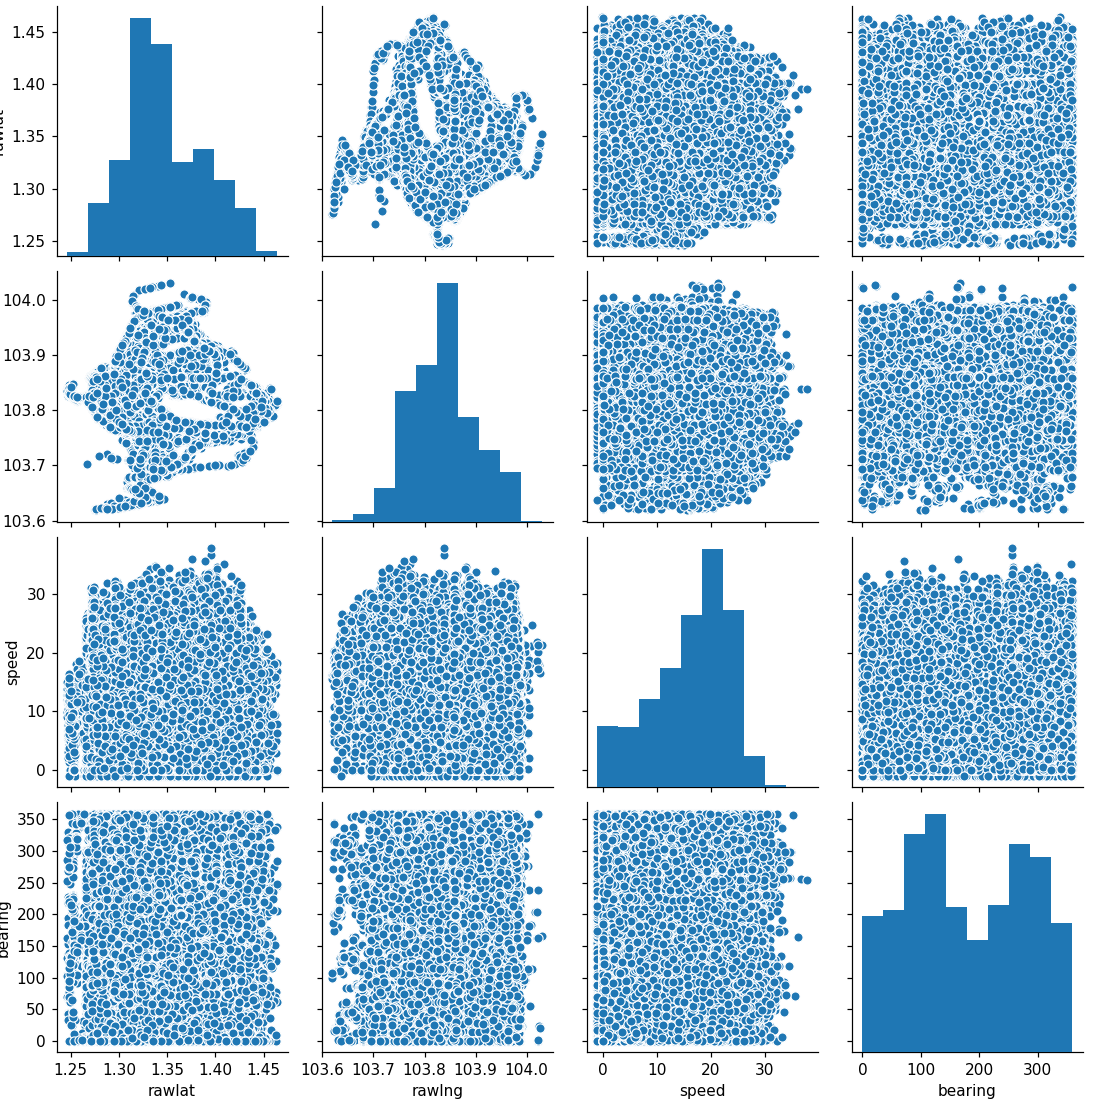

In [116]:
sns.pairplot(sg[['rawlat','rawlng', 'speed', 'bearing']])

In [122]:
X = sg[["rawlng", "rawlng", "speed"]]
max_k = 50

In [124]:
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans = make_pipeline(StandardScaler(), kmeans)
        kmeans.fit(X)
        distortions.append(model.inertia_)
    
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))

kmeans = KMeans(n_clusters = k, init="k-means++")
kmeans = make_pipeline(StandardScaler(), kmeans)
kmeans = kmeans.fit(data)
kmeans = kmeans[-1]

In [127]:
kmeans.cluster_centers_
print(k)

28


In [128]:
sg['Clusters'] = kmeans.labels_
sg.head()

,trj_id,driving_mode,osname,pingtimestamp,rawlat,rawlng,speed,bearing,accuracy,Clusters
2952730,65751,car,android,1555138025,1.303484,103.853317,12.474921,305,4.0,13
1041831,148,car,ios,1554771359,1.389845,103.910991,9.917789,138,8.0,19
897268,64671,car,android,1554699971,1.329250,103.858195,13.776122,245,6.0,13
2986448,62914,car,android,1555376313,1.306888,103.818565,1.270000,81,3.0,10
699750,80212,car,android,1555165203,1.315281,103.846215,19.761515,217,8.0,2


<IPython.core.display.Javascript object>


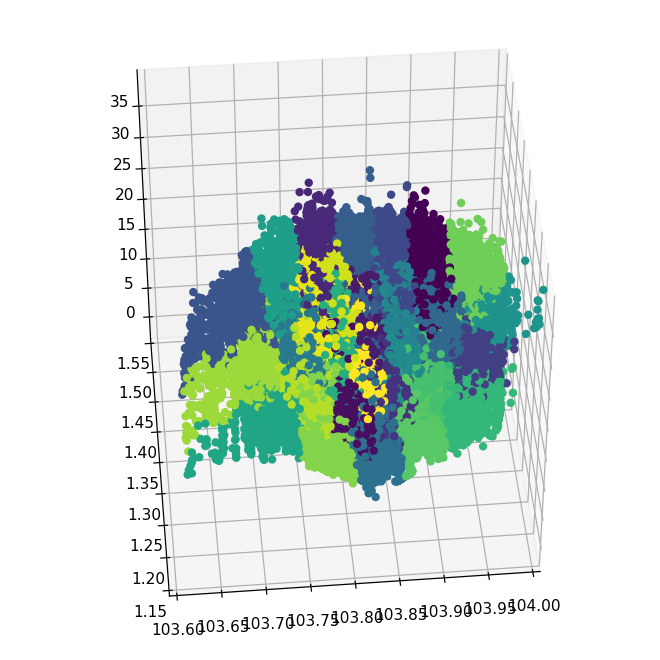

<ipython-input-130-ce1d671ec04f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_axes(ax)


In [130]:
#3d
%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

ax.set_xlim3d(103.6, 104)
ax.set_ylim3d(1.15, 1.55)


sc = ax.scatter(sg[["rawlng"]], sg[["rawlat"]], sg[["speed"]], c=sg[["Clusters"]], cmap='viridis', alpha=1)